# Classification trees

## Intro

Classification trees are one type of **decision tree** that can be used for predicting categorical outputs.
In the next notebook we will look at regression trees, which are used for making continuous predictions.

If you have ever played the game 21 questions then you already know what a classification tree is.
Or if you've ever tried to code up an artificial general intelligence using a lot of `if` statements, then you've essentially built up your own decision tree by hand.

These examples use the obvious approach of building a classifier by asking a series of yes/no questions.
The answer to each question gives you more info on class of the object until the range of possible options becomes fine enough for you to settle on a prediction.

Below is an example of such a classifier.
This one predicts the gender using the height and weight of an example person.

![](images/CARTS_example_tree.png)

The above examples however, depend on you finding the right questions to ask manually.
We'd like to be able to find the right questions to ask automatically, using machine learning.
This means that we need to start quantifying what makes a **good** split.

![](images/CARTS_geni_impurity.png)

![](images/CARTS_split_pos.png)

Let's build a classification tree from scratch. The first cell below just sets up some helper functions that we used previously.

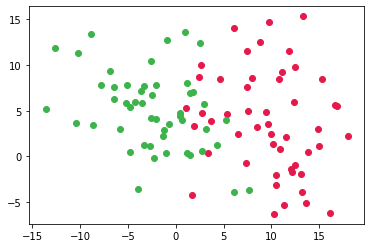

In [29]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
from get_colors import colors

def get_data(sd=6, m=100, n_features=2, n_clusters=2):
    X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=sd)
    return X, Y

def show_data(X, Y, predictions=None):
    for i in range(min(Y), max(Y)+1):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
    plt.show()

def visualise_predictions(H, X, n=50):
    xmin, xmax, ymin, ymax = min(X[:, 0]), max(X[:, 0]), min(X[:, 1]), max(X[:, 1])
    meshgrid = np.zeros((n, n))
    for x1_idx, x1 in enumerate(np.linspace(xmin, xmax, n)): # for each column
        for x2_idx, x2 in enumerate(np.linspace(ymin, ymax, n)): # for each row
            h = H(np.array([[x1, x2]])).astype(int)[0]
            # plt.scatter(x1, x2, c=colors[h])
            meshgrid[n-1-x2_idx, x1_idx] = h # axis 0 is the vertical direction starting from the top and increasing downward
    # meshgrid[n-1, 0] = 1000
    plt.imshow(meshgrid, extent=(xmin, xmax, ymin, ymax), cmap='viridis')

m = 100
n_features = 2
n_classes = 2
X, Y = get_data(5, m, n_features, n_classes)
show_data(X, Y)

In [30]:


def get_region_impurity(examples_in_region):
    x, Y = examples_in_region
    n_classes = np.ptp(Y)
    n_datapoints = len(x)
    # print('n_classes:', n_classes)
    impurity = 0
    for class_idx in range(n_classes):
        n_examples_in_class = len(x[Y == class_idx])
        p_k = n_examples_in_class / n_datapoints
        impurity += p_k * (1 - p_k)
    return impurity

def get_split_impurity(x, Y, split_pos):
    in_first_region = (x[x > split_pos], Y[x > split_pos])
    not_in_first_region = (x[x <= split_pos], Y[x <= split_pos])
    impurity = 0
    impurity += get_region_impurity(in_first_region)
    impurity += get_region_impurity(not_in_first_region)
    return impurity

def get_split_candidates(x):
    return (x[:-1] + x[1:]) / 2

def get_best_split(X, Y):
    best_feature_to_split_on = None
    best_impurity = float('inf')
    best_split_pos = None
    for feature_idx in range(n_features): # for each feature
        x = X[:, feature_idx] # get this feature from each example
        split_pos, split_impurity = get_best_split_on_this_feature(x, Y)
        if split_impurity < best_impurity:
            best_split_pos = split_pos
            best_impurity = split_impurity
            best_feature_to_split_on = feature_idx
    return best_split_pos, best_impurity, best_feature_to_split_on

def get_best_split_on_this_feature(x, Y):
    split_candidates = get_split_candidates(x)
    best_impurity = float('inf')
    best_split_pos = None
    for split_pos in split_candidates:
        impurity = get_split_impurity(x, Y, split_pos)
        if impurity < best_impurity:
            best_impurity = impurity
            best_split_pos = split_pos
    return best_split_pos, best_impurity

def extend_tree(X, Y, depth=0):
    split_val, split_impurity, split_feature = get_best_split(X, Y)
    # tree['split'] 
    positive_idxs = X[:, split_feature] > split_val
    positive_X = X[positive_idxs]
    positive_Y = Y[positive_idxs]
    negative_idxs = np.logical_not(positive_idxs)
    negative_X = X[negative_idxs]
    negative_Y = Y[negative_idxs]
    new_branch = {
        'feature_to_split_on': split_feature,
        'value_to_split_on': split_val,
        'split_impurity': split_impurity,
    }

    if depth < max_depth: # if not yet at max depth
        new_branch.update({
            'positive_branch': extend_tree(positive_X, positive_Y, depth=depth+1),
            'negative_branch': extend_tree(negative_X, negative_Y, depth=depth+1)
        })
    return new_branch

def get_split(X, Y, tree):
    features = X[:, tree['split']['feature_to_split_on']]
    idxs = features > tree['split']['value_to_split_on']
    return (X[idxs], Y[idxs]), (X[np.logical_not(idxs)], Y[np.logical_not(idxs)])

def train(X, Y, max_depth=4):
    return extend_tree(X, Y)

def predict()

max_depth=2
tree = train(X, Y)
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint
pp(tree)

{   'feature_to_split_on': 0,
    'negative_branch': {   'feature_to_split_on': 0,
                           'negative_branch': {   'feature_to_split_on': 0,
                                                  'split_impurity': 0,
                                                  'value_to_split_on': -13.100765365979232},
                           'positive_branch': {   'feature_to_split_on': 1,
                                                  'split_impurity': 0.024983563445101904,
                                                  'value_to_split_on': 13.47752743911471},
                           'split_impurity': 0.024375,
                           'value_to_split_on': -11.2098478311618},
    'positive_branch': {   'feature_to_split_on': 0,
                           'negative_branch': {   'feature_to_split_on': 0,
                                                  'split_impurity': 0.13888888888888887,
                                                  'value_to_split_on': 15.51846